In [1]:
import sys
import os
import io

sys.path.insert(0, '../model')

import torch

In [2]:
from model import CNN, classify

model = CNN()

model.load_state_dict(torch.load(os.path.join("../model/model.pth")))
model.eval()


CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=8192, out_features=14, bias=True)
)

In [3]:
from io import StringIO
import gzip
from PIL import Image

x = []
y = []

import zipfile
from PIL import Image
sizedir = {
    '-': 0,
    '+': 0,
    'times': 0,
    'div': 0,
    '0': 0,
    '1': 0,
    '2': 0,
    '3': 0,
    '4': 0,
    '5': 0,
    '6': 0,
    '7': 0,
    '8': 0,
    '9': 0,
}

with zipfile.ZipFile('../../dataset.zip', 'r') as zip:
    classname = ""
    for name in zip.namelist():
        if name.endswith('/'):
            classname = name
        else:
            sizedir[classname[classname.index('/')+1:-1]] += 1
print(sizedir)
print(sizedir.keys())
print([float(i) for i in sizedir.values()])

{'-': 33997, '+': 25112, 'times': 3251, 'div': 868, '0': 6914, '1': 26520, '2': 26140, '3': 10909, '4': 7396, '5': 3545, '6': 3118, '7': 2909, '8': 3068, '9': 3737}
dict_keys(['-', '+', 'times', 'div', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
[33997.0, 25112.0, 3251.0, 868.0, 6914.0, 26520.0, 26140.0, 10909.0, 7396.0, 3545.0, 3118.0, 2909.0, 3068.0, 3737.0]


<AxesSubplot:>

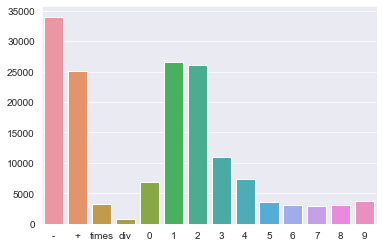

In [4]:
import seaborn as sns

sns.set_style('darkgrid')
sns.barplot(x=list(sizedir.keys()), y=[float(i) for i in sizedir.values()])
